##### Carregando as bibliotecas e definindo funções últeis

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform, data, io, color, img_as_ubyte


In [23]:
def showImage(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [24]:
def low_pass(image, cutoff_radius):
    
    # Converter a imagem para escala de cinza se necessário
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Transformada de Fourier 2D
    image_fft =  np.fft.fftshift(np.fft.fft2(image))

    # Obter as dimensões da imagem
    rows, cols = image.shape

    # Criar um filtro passa-baixa (círculo)
    x, y = np.ogrid[:rows, :cols]
    center = (rows // 2, cols // 2)
    mask = np.exp(-((x - center[0])**2 + (y - center[1])**2) / (2 * (cutoff_radius * rows)**2))

    # Aplicar o filtro e inverte a centralização
    image_fft_filtered = np.fft.ifftshift(image_fft * mask)

    # Inverter a transformada de Fourier
    image_filtered = np.abs(np.fft.ifft2(image_fft_filtered))

    return img_as_ubyte(image_filtered)

##### Questão 01

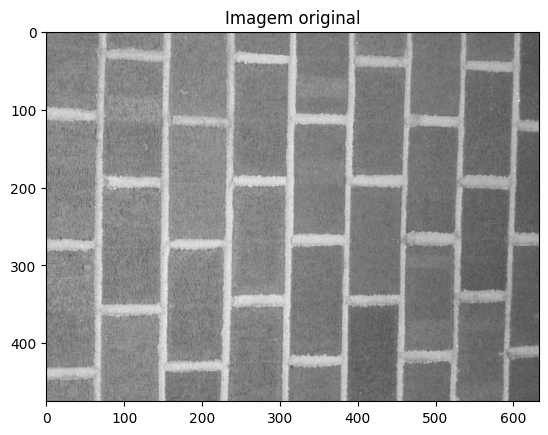

'\n    A imagem carregada mostra uma parede feita de tijolos e cimento.\n    \n'

In [27]:
# Carregar a imagem bricks.jpg
image = io.imread('bricks.jpg')

showImage(image, "Imagem original")

'''
    A imagem carregada mostra uma parede feita de tijolos e cimento.
    
'''

##### Questão 02

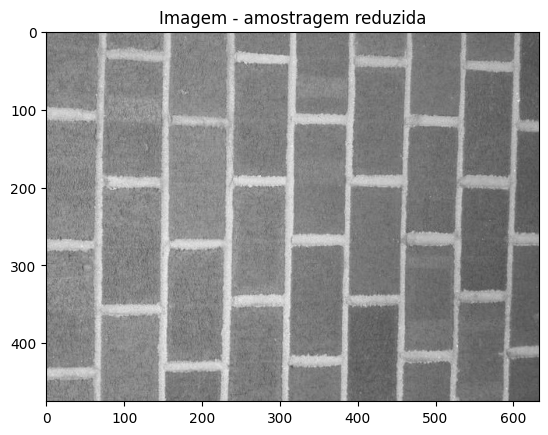

In [28]:
# Definir a nova taxa de amostragem - redução por um fator de 16 (um quarto do tamanho original em ambas as dimensões)
image_less_simple = transform.rescale(image, 0.25)

showImage(image, "Imagem - amostragem reduzida")

'''
    explicação aqui!
    
'''

##### Questão 03

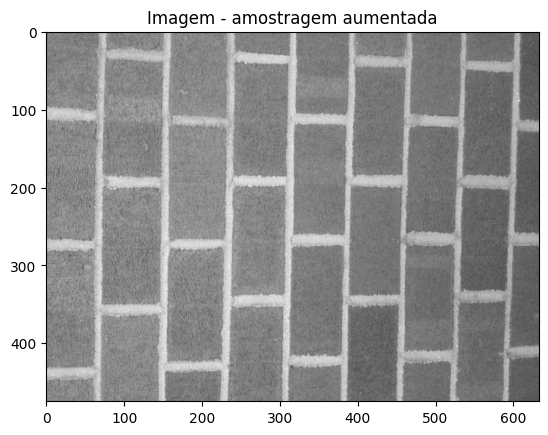

In [29]:
# Definir a nova taxa de amostragem - aumento por um fator de 16 (quarto veses o tamanho original em ambas as dimensões)
image_more_simple = transform.rescale(image, 4)

showImage(image, "Imagem - amostragem aumentada")

'''
    explicação aqui!
    
'''

##### Questão 04

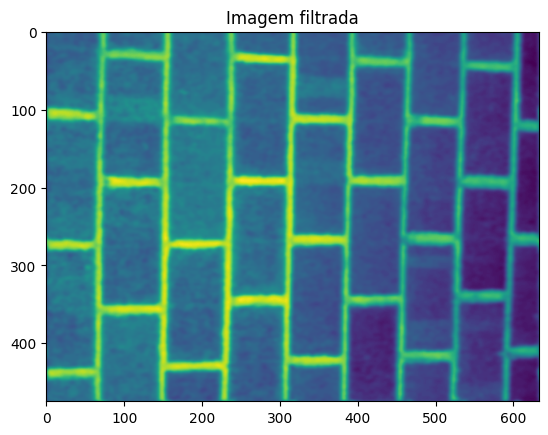

In [30]:
image_filtered = low_pass(image, 0.08)
showImage(image_filtered, "Imagem filtrada")

'''
    explicação aqui!
    
'''
